In [1]:
# conventional way to import pandas
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
import pylab as pl
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# DF TO EXCEL
from pandas import ExcelWriter
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from pandas import ExcelWriter

In [2]:
# read CSV file from the 'data' subdirectory using a relative path
Dataset= pd.read_csv('C:\\Users\\Admin\\Desktop\\CS3123\\Data_Set\\Dataset.csv')

# display the first 5 rows
Dataset.head()

,0,0.1,1,2,3,4,5,6,7,8,...,436,437,438,439,440,441,442,443,444,445
0,1.204940e+12,1,79,1.0,4597,73.0,164.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,40.0,-1.0,-1.0,-1.0
1,1.407940e+12,2,76,0.0,4595,74.0,172.0,NaN,1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,55.0,-1.0,-1.0,-1.0
2,2.112950e+12,3,72,1.0,4602,NaN,NaN,NaN,1,1,...,-1.0,-1.0,-1.0,NaN,NaN,1.0,72.0,-1.0,-1.0,-1.0
3,4.129550e+11,4,63,1.0,4600,75.0,168.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,20.0,NaN,1.0,55.0,-1.0,-1.0,-1.0
4,2.307940e+12,5,80,0.0,4679,85.0,187.0,NaN,-1,-1,...,-1.0,-1.0,-1.0,NaN,NaN,1.0,27.0,-1.0,-1.0,-1.0


In [3]:
# Drop index and unnessery featuer 
Dataset.drop(['0', '0.1','3'], axis=1,inplace=True)

In [4]:
#Drop all features except (Age - gender -Height -weight)
subset=Dataset.drop(Dataset.columns.to_series()["6":"445"], axis=1)

In [5]:
subset.shape

(2772, 4)

In [6]:
#Missing da


In [7]:
import numpy as np

# Drop sample that has missing value in Gender feater 
H_Data=subset.drop(subset.index[1319])

H_Data.shape

(2771, 4)

In [8]:
#removing outliers
H_Data = H_Data[(H_Data['1']> 0)]
H_Data= H_Data[(H_Data['1']<100)]



In [9]:
H_Data.shape

(2759, 4)

In [10]:
#Removing outliers from Hight
Data = H_Data[(H_Data['5']> 145)]
Data = H_Data[(H_Data['5']<195)]

# Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

In [11]:
Data.shape

(2340, 4)

In [12]:
#Removing outliers from Weight
Data = Data[(Data['4']> 38)]
Data = Data[(Data['4']<250)]

In [13]:
Data.shape

(2334, 4)

In [14]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

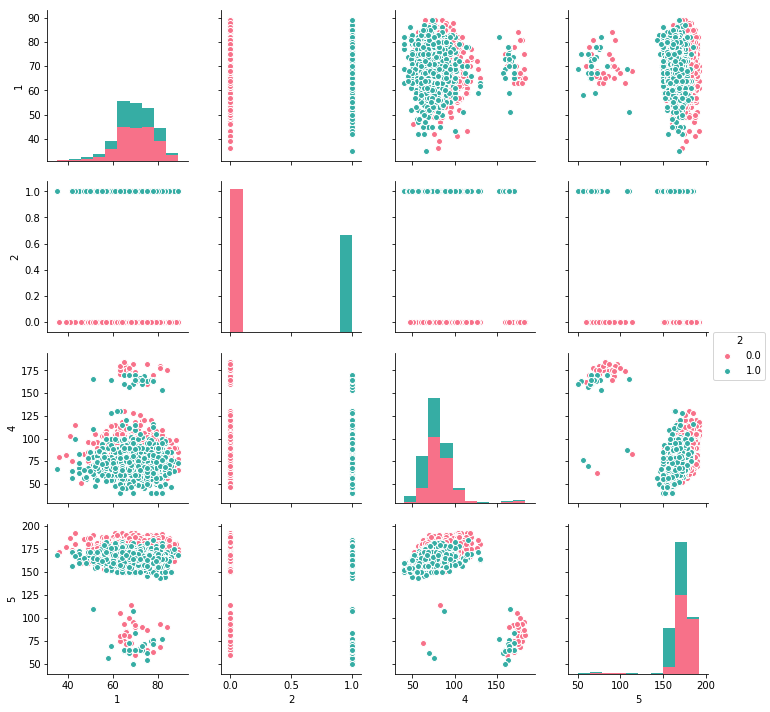

In [15]:
sns.pairplot(Data,  hue="2",palette="husl")

In [16]:
Data=Data.dropna()
# create a Python list of feature names
feature_cols = ['1', '4', '5']

# use the list to select a subset of the original DataFrame
X = Data[feature_cols]

# equivalent command to do this in one line
X = Data[['1', '4', '5']]



In [17]:
# Female subset
F_Data=Data[Data['2'] == 0.0]
#Male subset
M_Data=Data[Data['2'] == 1.0]

In [18]:
BF_Data=F_Data.sample(943, random_state=0)

In [19]:
frames = [M_Data, BF_Data]

In [20]:
MF_Data = pd.concat(frames)

In [21]:
MF_Data= MF_Data[(MF_Data['1']> 0)]
MF_Data =MF_Data[(MF_Data['1']<100)]


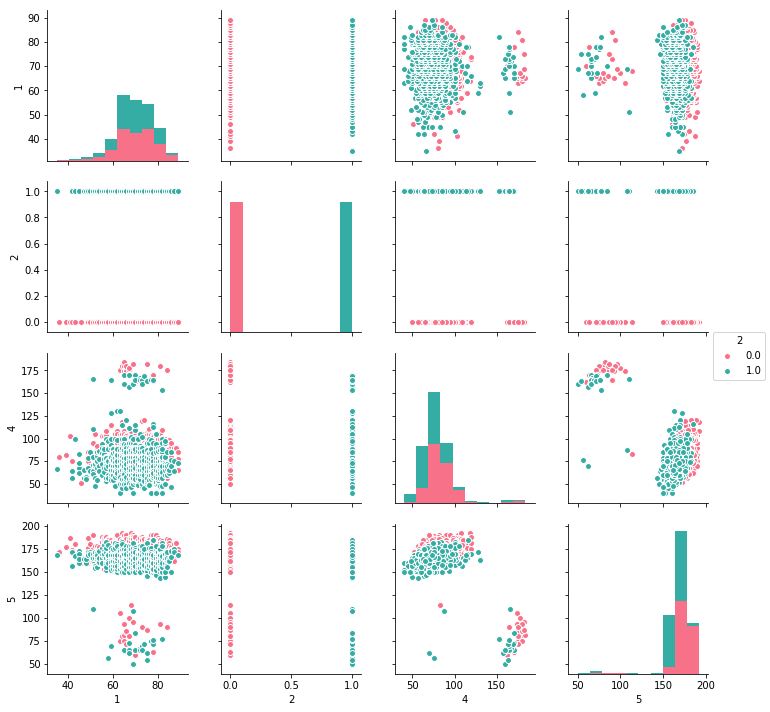

In [22]:
MF_Data=MF_Data.sort_values("1", ascending = 'True')
MF_Data
sns.pairplot(MF_Data,  hue="2",palette="husl")


# Task 7: Cross Validation CV

In [23]:
# select a Series from the DataFrame
y = MF_Data['2']
TT=MF_Data.drop(['2'],axis=1)
X=TT[:]
# print the first 5 values
y.shape


(1886,)

In [24]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(1886,)


# KNN ML Algorithm With Accuracy 79%

In [25]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
#(scores)

In [26]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of K-NN classifier on test set:',scores.mean())


Accuracy of K-NN classifier on test set: 0.7491769316909295


In [27]:
# search for an optimal value of K for KNN
k_range = list(range(1, 50))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)


[0.6977939529675251, 0.6898040313549832, 0.7322732362821948, 0.7343113101903695, 0.7491769316909295, 0.7507614781634937, 0.7629899216125419, 0.7619372900335946, 0.7778387458006719, 0.7693673012318029, 0.7826427771556551, 0.777855543113102, 0.7916517357222844, 0.7836954087346025, 0.7927323628219485, 0.7943113101903696, 0.789535274356103, 0.786892497200448, 0.7927435610302352, 0.7906159014557671, 0.7863829787234041, 0.7863829787234041, 0.7879787234042552, 0.7901063829787234, 0.7848096304591267, 0.7916853303471445, 0.7847872340425532, 0.7847984322508398, 0.7826819708846584, 0.7842609182530794, 0.7805487122060469, 0.7842609182530795, 0.782144456886898, 0.7784322508398656, 0.7800223964165733, 0.7784434490481523, 0.7858678611422172, 0.7842665173572227, 0.7832082866741321, 0.7847816349384098, 0.7848040313549832, 0.7826819708846584, 0.7879787234042552, 0.7885106382978723, 0.7853247480403135, 0.7826875699888017, 0.7869372900335947, 0.7837513997760358, 0.7858678611422173]


Text(0,0.5,'Cross-Validated Accuracy')

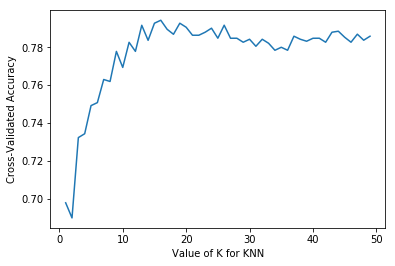

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [29]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=24)
y_pred_K = cross_val_predict(knn, X, y, cv=10)
conf_mat_KNN = confusion_matrix(y, y_pred_K)
print('Accuracy of KNN classifier on test set:',cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())


Accuracy of KNN classifier on test set: 0.7901063829787234


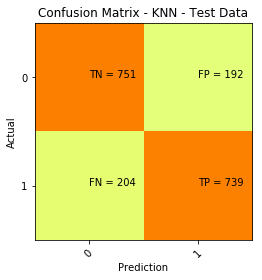

In [30]:
plt.clf()
plt.imshow(conf_mat_KNN, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - KNN - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_KNN[i][j]))
plt.show()

In [31]:
print(classification_report(y, y_pred_K))

             precision    recall  f1-score   support

        0.0       0.79      0.80      0.79       943
        1.0       0.79      0.78      0.79       943

avg / total       0.79      0.79      0.79      1886



#  Decision Tree with Accuracy 67%

In [32]:
#10-fold cross-validation with Decision Tree
DT = DecisionTreeClassifier()
scores = cross_val_score(DT, X, y, cv=10, scoring='accuracy')
y_pred_DT = cross_val_predict(DT, X, y, cv=10)
conf_mat_DT = confusion_matrix(y, y_pred_DT)
#print(scores)

In [33]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of Decision Tree classifier on test set:',scores.mean())

Accuracy of Decision Tree classifier on test set: 0.6611870100783874


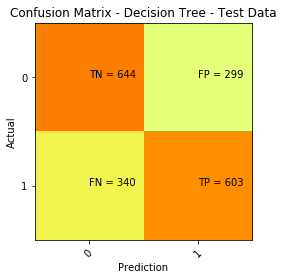

In [34]:
plt.clf()
plt.imshow(conf_mat_DT, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - Decision Tree - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_DT[i][j]))
plt.show()

In [35]:
print(classification_report(y, y_pred_DT))

             precision    recall  f1-score   support

        0.0       0.65      0.68      0.67       943
        1.0       0.67      0.64      0.65       943

avg / total       0.66      0.66      0.66      1886



#  Logistic Regrassion with Accuracy 73%

In [36]:
# 10-fold cross-validation with logistic regression
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
y_pred_LR= cross_val_predict(logreg, X, y, cv=10)
conf_mat_LR= confusion_matrix(y, y_pred_LR)
#print(scores)


In [37]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of logistic regression classifier on test set:',scores.mean())

Accuracy of logistic regression classifier on test set: 0.7317917133258679


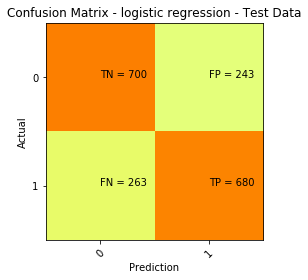

In [38]:
plt.clf()
plt.imshow(conf_mat_LR, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - logistic regression - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_LR[i][j]))
plt.show()

In [39]:
print(classification_report(y, y_pred_LR))

             precision    recall  f1-score   support

        0.0       0.73      0.74      0.73       943
        1.0       0.74      0.72      0.73       943

avg / total       0.73      0.73      0.73      1886



#  Linear Discriminant Analysis with Accuracy 74%

In [40]:
#10-fold cross-validation with Discriminant Analysis
lda = LinearDiscriminantAnalysis()
scores = cross_val_score(lda, X, y, cv=10, scoring='accuracy')
y_pred_LDA= cross_val_predict(lda, X, y, cv=10)
conf_mat_LDA= confusion_matrix(y, y_pred_LDA)
#print(scores)

In [41]:
# use average accuracy as an estimate of out-of-sample accuracy
print('Accuracy of LDA classifier on test set:',scores.mean())

Accuracy of LDA classifier on test set: 0.7423404255319149


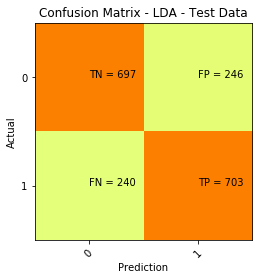

In [42]:
plt.clf()
plt.imshow(conf_mat_LDA, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - LDA - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_LDA[i][j]))
plt.show()

In [43]:
print(classification_report(y, y_pred_LDA))

             precision    recall  f1-score   support

        0.0       0.74      0.74      0.74       943
        1.0       0.74      0.75      0.74       943

avg / total       0.74      0.74      0.74      1886



In [44]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
y_pred_clf= cross_val_predict(clf, X, y, cv=10)
conf_mat_clf= confusion_matrix(y, y_pred_clf)
#print(scores)
print('Accuracy of Random Forest Classifier on test set:',scores.mean())

Accuracy of Random Forest Classifier on test set: 0.796959686450168


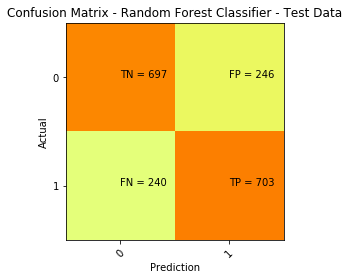

In [48]:
plt.clf()
plt.imshow(conf_mat_clf, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - Random Forest Classifier - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_LDA[i][j]))
plt.show()

In [49]:
print(classification_report(y, y_pred_clf))

             precision    recall  f1-score   support

        0.0       0.81      0.78      0.79       943
        1.0       0.78      0.82      0.80       943

avg / total       0.80      0.80      0.80      1886



In [46]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
scores = cross_val_score(NN, X, y, cv=10, scoring='accuracy')
y_pred_NN= cross_val_predict(NN, X, y, cv=10)
conf_mat_SVM= confusion_matrix(y, y_pred_NN)
#print(scores)
print('Accuracy of NN classifier on test set:',scores.mean())

Accuracy of NN classifier on test set: 0.6664501679731243


In [50]:
from sklearn.svm import SVC  
SVM= SVC(kernel='linear') 
scoresM = cross_val_score(SVM, X, y, cv=10, scoring='accuracy')
y_pred_SVM= cross_val_predict(SVM, X, y, cv=10)
conf_mat_SVM= confusion_matrix(y, y_pred_SVM)
#print(scores)
print('Accuracy of  SVC classifier on test set:',scoresM.mean())

Accuracy of  SVC classifier on test set: 0.7651231802911533


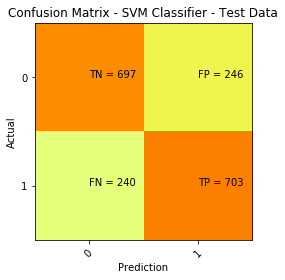

In [51]:
plt.clf()
plt.imshow(conf_mat_SVM, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Confusion Matrix - SVM Classifier - Test Data')
plt.ylabel('Actual')
plt.xlabel('Prediction')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(conf_mat_LDA[i][j]))
plt.show()

In [52]:
print(classification_report(y, y_pred_SVM))

             precision    recall  f1-score   support

        0.0       0.78      0.73      0.76       943
        1.0       0.75      0.80      0.77       943

avg / total       0.77      0.77      0.76      1886

